# Classification Predict Student Solution

*   List item
*   List item



© Explore Data Science Academy

---
Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: 2021/22 Climate Change Belief Analysis

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

![alt text](https://miro.medium.com/max/1050/1*vp1M37AGMOFwCvLxVm62IA.jpeg)
<span>Photo by <a href="https://medium.com/@bensonruan">Benson Ruan</a> 

### Problem statement
Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment

  ### Sentiment Discription
  
        Class   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [25]:
# !pip install fastText
# !pip install langdetect
# !pip install contractions
# !pip install scikit-plot

In [52]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
#from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
#import fasttext
#import spacy.cli
#from langdetect import detect
#import contractions
#import unicodedata
import numpy as np
import pandas as pd
#import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
#spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

df_train: Dataframe that contains all the variables that should be used to train the model

df_test : Dataframe that contains variables that will be used to test the model

In [13]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

Peak inside the dataframes.

In [4]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


 **Variables definitions**

- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

*Get* information about the dataframe.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Get statistics about the dataframe.

In [6]:
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Get information about the null columns/rows in the dataframe.

In [7]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

**Data Description**


* Has no null/missing values
* The train and test datasets contains one categorical column called 'message'
* The train dataset contains three columns
* Some tweets contain twitter handles,numbers,hashtags and re-tweets.
* New lines are represented by '\n' in the tweet string.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
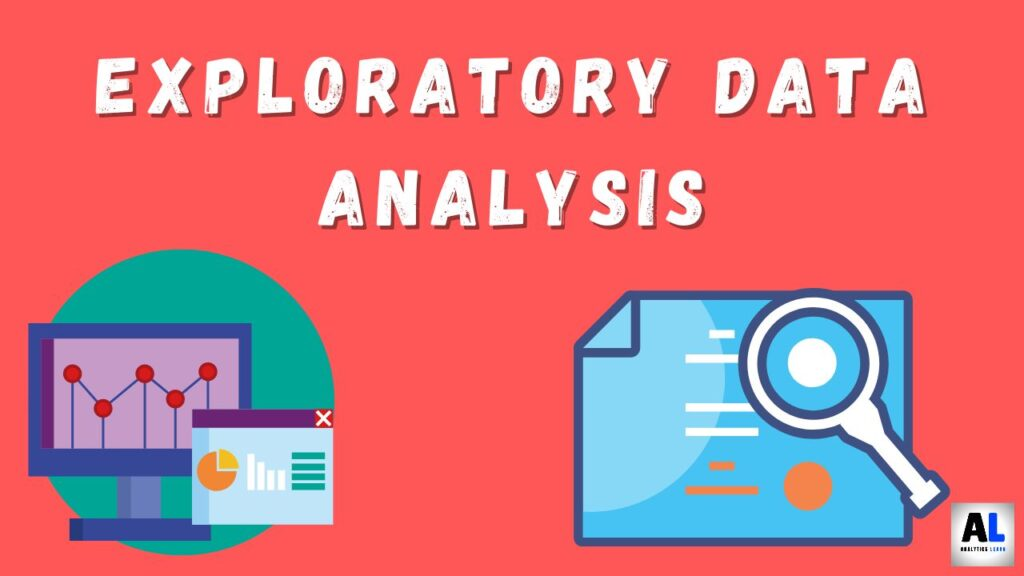
| ⚡ Description: Exploratory data analysis ⚡ |

| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

Create a dataframe copy

In [40]:
df = df_train.copy()

Let us look at the sentiment for tweets

Text(0.5, 1.0, 'Sentiment Distributions')

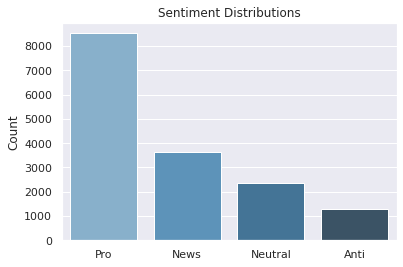

In [41]:
sentiment_distribution = pd.DataFrame(list(df['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])
sns.set()
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.Count, 
           palette="Blues_d")
plt.title('Sentiment Distributions')


it looks like there are more Pro news than that of other sentiments. Which means there is an imbalnce of data.

Let us look at the number of words in tweets

Create a new dataframe

In [48]:
tweets_df = df[['message','sentiment']]

Create classes of sentiments

In [49]:
news_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweet_df['message']
                       [tweet_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweet_df['message']
                           [tweet_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == -1]])

Visualise classes of sentiments

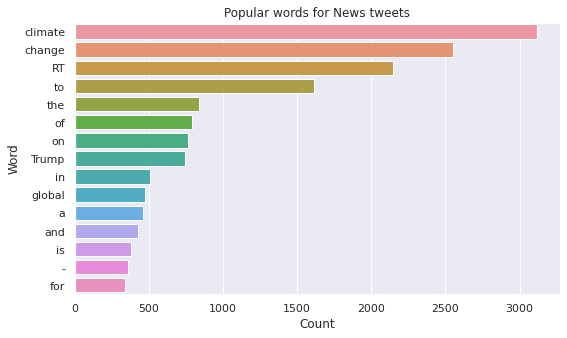

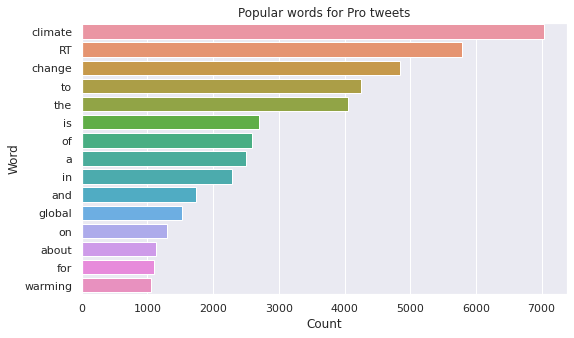

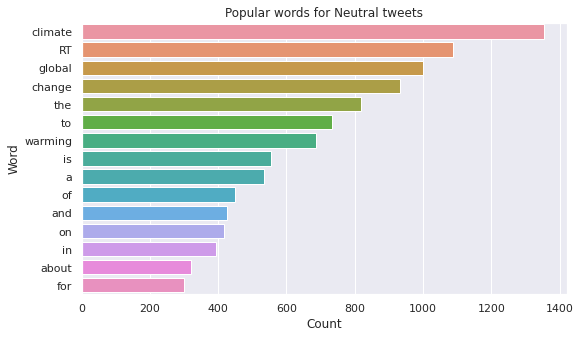

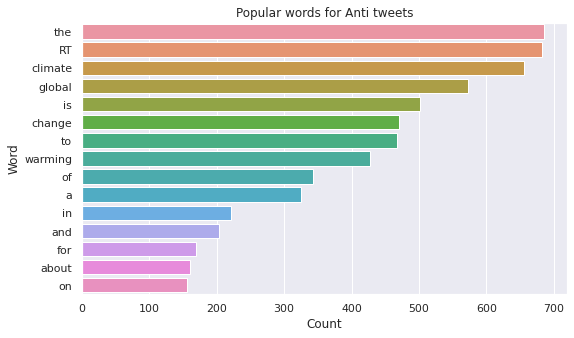

In [50]:
full_title = ['Popular words for News tweets',
              'Popular words for Pro tweets',
              'Popular words for Neutral tweets',
              'Popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [40, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

A lot of unimportant words and stopwords are misclassified here as important

Create wordcloud

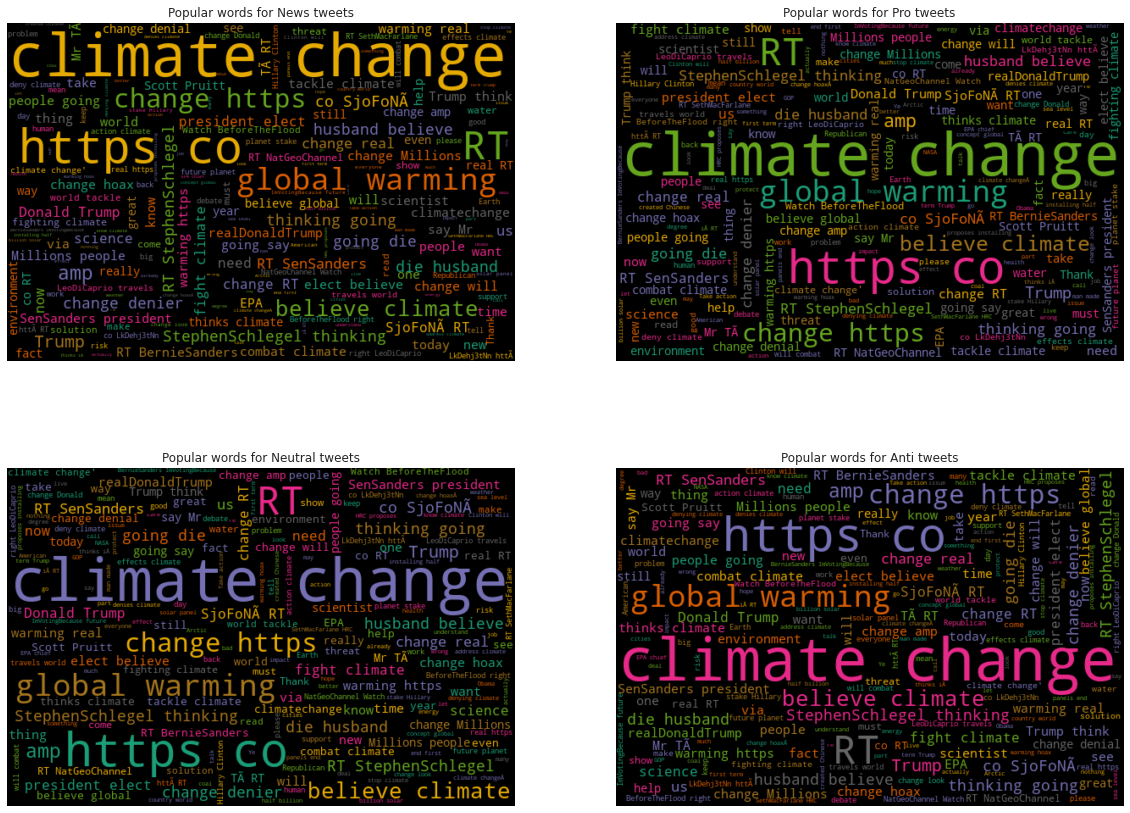

In [51]:
wc = WordCloud(width=600, height=400, 
               background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

We created a wordcloud to visualize the most tweeted keywords in each sentiment class. We see that A lot of unimportant words and stopwords are still visiable. We also see that the keywords "climate change, global warming and belief" are common in all sentiment classes. 'https' words are frequent in all sentiment classes to show that links are shared in tweets

Extracting hashtags

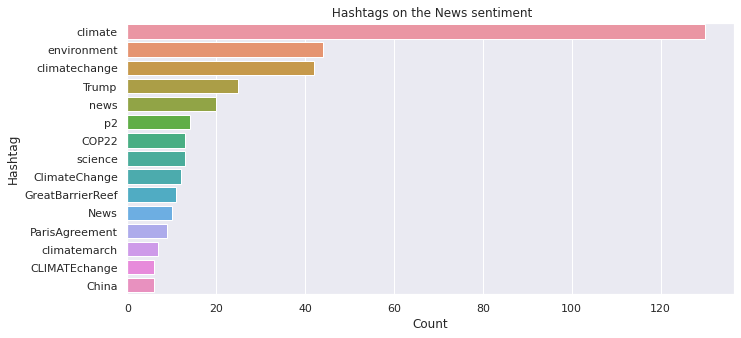

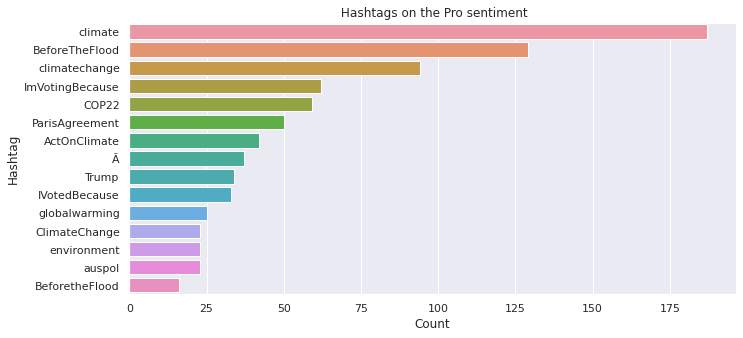

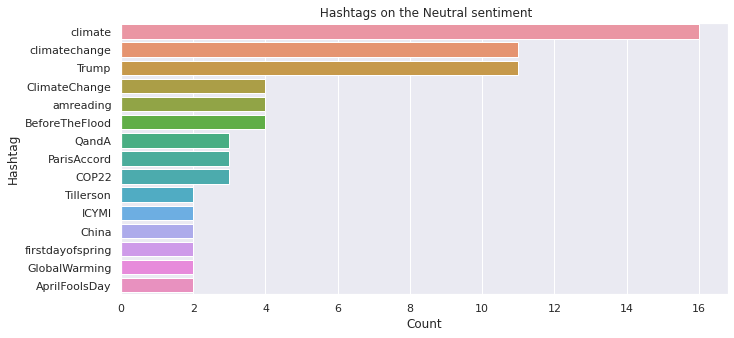

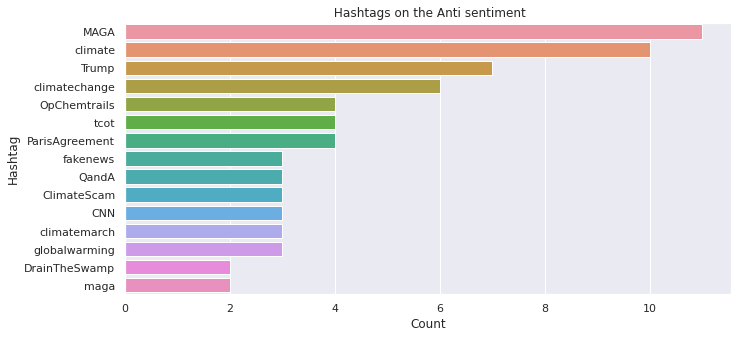

In [52]:
def extract_hashtags(x):
    hashtags = []
    for i in x:
        hash = re.findall(r'#(\w+)', i)
        hashtags.append(hash)
        
    return hashtags

# Extracting hashtags from tweets
news_hashtags = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_hashtags = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_hashtags = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_hashtags = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# hashtag list
hashtags = [sum(news_hashtags, []), sum(pro_hashtags, []),
            sum(neutral_hashtags, []),sum(anti_hashtags, [])]

# Visualising the Hashtags
ft = [' Hashtags on the News sentiment',
              ' Hashtags on the Pro sentiment',
              ' Hashtags on the Neutral sentiment',
              ' Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count')
    plt.title(ft[i])
    plt.show()

Climate, chimatechange, Trump are one of the most common words

Find twitter handles

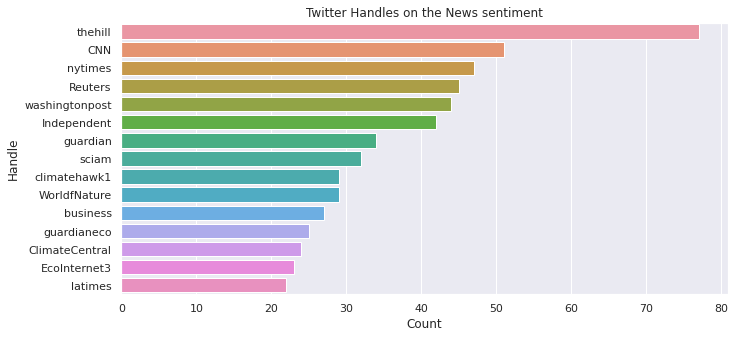

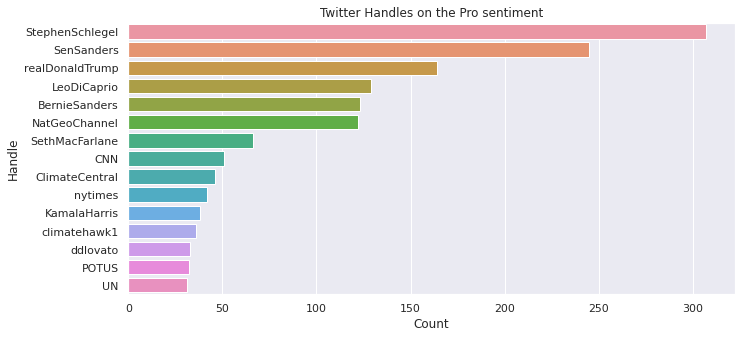

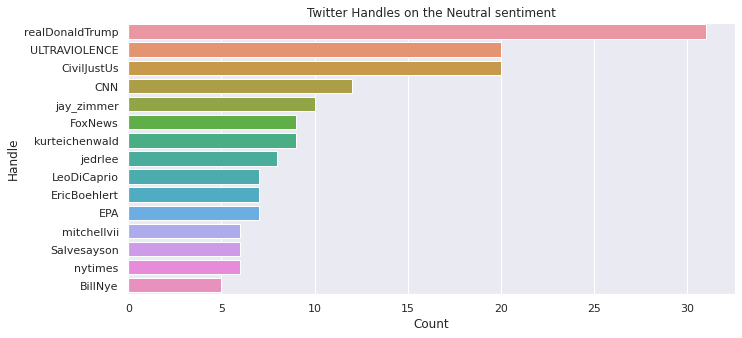

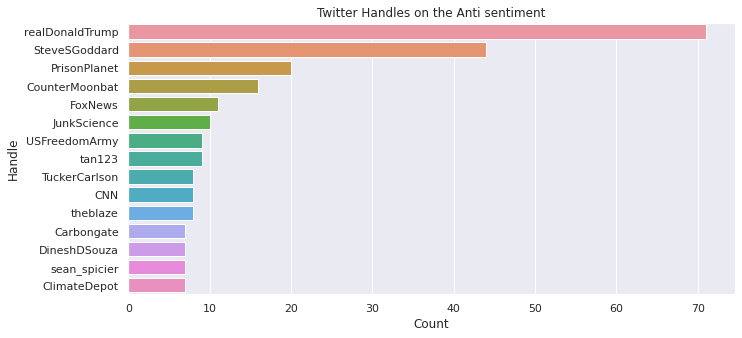

In [64]:
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

news_handles = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_handles = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_handles = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_handles = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# handle lists 
handles = [sum(news_handles, []), sum(pro_handles, []), sum(neutral_handles, []),
           sum(anti_handles, [])]

# Visualising the Handles
full_title = ['Twitter Handles on the News sentiment',
              'Twitter Handles on the Pro sentiment',
              'Twitter Handles on the Neutral sentiment',
              'Twitter Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

The most popular handles are that of networks and journalist

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |


---
Prior to training a model with any sort of data, it is essential to re-engineer it. This is to ensure that the data is in a consistent form with no missing values, incorrect data types or just plain incorrect data. For structured,  numeric data, this entails scaling values, filling in missing values and typecasting any non-numeric data to numeric form. Non-numeric data, such as this database is often unstructured and consists of text data. This type of data is not easily interpretable by computers. Computers work with 1s and 0s, not letters and words. Therefore it must be converted into a form that is interpretable, and therefore, numeric data. 

In [38]:
df = df_train.copy()

In [39]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### Text Cleaning -  Removing URLs

Many of the tweets in this dataset have URLs in them. For this project, we have decided to completely replace them with a consistent "url-web" token. Another option is to extract useful information from these links. One approach we tried was to extract the title of webpages in tweets and add them to the tweet text, this could potentially improve model quality, but there are several issues with this approach. Firstly, this dataset is a few years old, many of the URLs no longer exist, in addition to this, there appears to be an encoding issue with the some of the tweets which contain strange non-standard characters, when these characters occur in tweet URLs, this breaks it. 

---

Additionally, extracting information from URLs, aka webscraping, is a slow process. This dataset contains a few thousand URLs so to extract page titles from each URL a request needs to be sent, a response must be recieved and HTML data must be downloaded. Doing this a few times is not an issue but doing it a few thousand times takes a significant amount of time and data. It is possible to speed this process up by making it highly threaded, so that each URL isn't queryied sequentially, but this doesn't solve the problem entirely

In [40]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

The next step taken was to convert all capital letters to lowercase

In [41]:
df['message'] = df['message'].str.lower()

Remove stopwords

Removal of stopwords is actually going to be done during vectorization. However the internal sklearn implementation for the TfidfVectorizer is problematic so instead we'll be using a list NTLK's english stopwords during vectorization later 

In [37]:
ntlk_stopwords = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

remove all non-standard characters and punctuation. What remains in each tweet is now only lowercase letters, numbers and spaces.

In [42]:
normal_chars = 'abcdefghijklmnopqrstuvwxyz0123456789 '
def remove_weird_chars(post):
    return ''.join([l for l in post if l in normal_chars])

In [43]:
df['message'] = df['message'].apply(remove_weird_chars)

In [44]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Creating Features and labels datasets

In [45]:
X = df["message"]
y = df["sentiment"]

In [46]:
X.head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: message, dtype: object

## Train, test split

---
When training a model, it is essential to set some data aside that will not be exposed to the model during the initial training process. This data is used after training to evaluate the trained model's performance. If this is not done, we have no way of knowing how our model will perform on unseen data. Will it be able to generalize well? Or has it just learnt to minimize errors on the training data (ie our model is overfitted). Below we split our features and labels into training and testing sets, with the testing set being 25% of the total data set and the training set being the other 75%.

In [47]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Vectorizing using Tfidf

---
The overall process of turning a collection of text data into numerical vectors is called vectorization. This process is often divided into 3 steps:

1.Tokenize text by assigning an ID to each possible token, often by using whitespace as a token separator

2.Count the number of times each token occurs in the document

3.Normalizing and redicing the weighting of tokens that occur very often in the corpus as these likely do not assist in model training

After vectorization, a corpus of strings or documents can be stored as a matrix, where a row corresponds to a document and a column corresponds to a particular token. This strategy outlined above is known as 'Bag of Words' representation as text data is stored purely as counts of word occurances, with word order not being a factor.

---

tf–idf, the vectorization method here stands for term-frequency times inverse document-frequency, and it was used because it helps minimize the importance of tokens that appear frequently in the corpus. 

In [48]:
vect = TfidfVectorizer(min_df=2, max_df=0.25, analyzer='char', ngram_range=(6,6), stop_words=ntlk_stopwords)
vect.fit_transform(X_train)

<11864x91470 sparse matrix of type '<class 'numpy.float64'>'
	with 944852 stored elements in Compressed Sparse Row format>

In [49]:
pred_dict = {}

## Model 1: Complement Naive Bayes classifier

---
Naive Bayes Classifiers make use of Bayes Theorem to make predictions. Bayes theorem states that the probability of an event can be determined based on knowledge of the conditions that lead to that event. Bayes classifiers are considered 'Naive' because they assume that the features for every class are completely independant of each other. For the purposes of modelling . Naive Bayes classifiers are useful because they are relatively simple and therefore computationally easy to train on large datasets, for this reason it is the quickest model to train in this notebook. The model trained here is a variant of the MultinomialBayes Classifier known as the Complement Naive Bayes Classifier. Multinomial Bayes Classifiers are often used for text classification problems, with the Complement variant being especially suitable to inbalanced datasets.

In [50]:
param_grid_cnb = {'alpha': [0.01, 0.05, 0.1,0.25,0.5,0.75,1]}

In [53]:
grid_CNB = GridSearchCV(ComplementNB(), param_grid_cnb, scoring='f1_weighted')

In [54]:
grid_CNB.fit(vect.transform(X_train), y_train)
grid_CNB.best_params_

{'alpha': 0.5}

In [55]:
cnb = ComplementNB(alpha=0.5)

In [56]:
cnb.fit(vect.transform(X_train), y_train)
y_pred = cnb.predict(vect.transform(X_test))
pred_dict['CNB'] = y_pred

In [57]:
cnb_report = metrics.classification_report(y_test, y_pred,digits=3)

## Model 2: Linear Support Vector Classifier

---
Support Vector Classifiers work by identifying boundaries between groups of datapoints, the boundaries identified are known as decision boundaries, similar to those used by logistical regression models. However unlike logistical regression models SVCs use a differnt algorithm to identify boundaries, known as a kernel trick.

In [58]:
param_grid_lsvc = {'C': [0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]}

In [59]:
grid_SVC = GridSearchCV(LinearSVC(), param_grid_lsvc, scoring='f1_weighted')

In [60]:
grid_SVC.fit(vect.transform(X_train), y_train)
grid_SVC.best_params_

{'C': 1.5}

In [61]:
svc = LinearSVC(C=1.5)

In [62]:
svc.fit(vect.transform(X_train), y_train)
y_pred = svc.predict(vect.transform(X_test))
pred_dict['LSVC'] = y_pred

In [63]:
svc_report = metrics.classification_report(y_test, y_pred,digits=3)

## Model 3: Multinomial Logistical Regression

---
To do: Description

In [64]:
param_grid_MLR = {'C': [0.75, 1, 1.25]}

In [65]:
grid_MLR = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_MLR, scoring='f1_weighted')

In [66]:
#Grid search with different C values seems to get stuck. Don't run this cell
# grid_MLR.fit(vect.transform(X_train), y_train)
# grid_MLR.best_params_

In [67]:
mlr = LogisticRegression(C=1, max_iter=10000)

Multinomial logistic regression is computationally expensive, this cell below takes a few seconds to run..

In [68]:
mlr.fit(vect.transform(X_train), y_train)
y_pred = mlr.predict(vect.transform(X_test))
pred_dict['MLR'] = y_pred

In [69]:
mlr_report = metrics.classification_report(y_test, y_pred,digits=3)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### Classification Reports for all models

---
To do: discuss classification reports, graph F1-scores

In [70]:
print('Complement Naive Bayes classifier:')
print(cnb_report)
print('Support Vector Classifier:')
print(svc_report)
print('Multinomial Logistical Regression:')
print(mlr_report)

Complement Naive Bayes classifier:
              precision    recall  f1-score   support

          -1      0.754     0.464     0.575       336
           0      0.629     0.360     0.458       547
           1      0.782     0.841     0.810      2178
           2      0.683     0.836     0.752       894

    accuracy                          0.741      3955
   macro avg      0.712     0.625     0.649      3955
weighted avg      0.736     0.741     0.728      3955

Support Vector Classifier:
              precision    recall  f1-score   support

          -1      0.816     0.500     0.620       336
           0      0.606     0.424     0.499       547
           1      0.785     0.885     0.832      2178
           2      0.774     0.789     0.781       894

    accuracy                          0.767      3955
   macro avg      0.745     0.649     0.683      3955
weighted avg      0.760     0.767     0.757      3955

Multinomial Logistical Regression:
              precision    recall

### Confusion Matricies

---
Shown below are the confusion matricies for the three models we fitted to the vectorized training data. Cell labels have all been normalized, so the values represent percentages of the total of each class. What is immediately clear is that all 3 models struggle to overcome the class inbalance in the dataset. The logistic regression model is by far the worst in this regard, as it is very biased towards the Pro (1) sentiment class when presented with tweets belonging to the Anti and Neutral (-1,0) sentiment classes. Since the majority of tweets in the dataset belong to the News and Pro classes (1,2), the model naturally performs much better when presented with tweets of these classes. The other two models exhibit similar behaviour, but are able to correctly identify tweets in the anti class almost twice as often as the logistic regression model. Like the Logistic Regression model, both models also struggle to correctly identify neutral tweets, although the Support Vector Classifier in particular does perform slightly better in this regard.

---

The primary conclusion that can be drawn from these confusion matricies is just how detrimental imbalanced data is to model quality. Since the dataset was not particularly large to begin with, a few hundred tweets belonging to the anti and neutral classes is simply not enough data for the models to train on. Since there were a few thousand tweets belonging to the Pro and News classes, all three models were much better at identifying tweets belonging to these classes.

In [71]:
cm_cnb = confusion_matrix(y_test, pred_dict['CNB'])
cm_svc = confusion_matrix(y_test, pred_dict['LSVC'])
cm_mlr = confusion_matrix(y_test, pred_dict['MLR'])
labels = ['-1: Anti', '0: Neutral', '1: Pro', '2: News']

In [72]:
cm_cnb = cm_cnb/cm_cnb.sum(axis=1).reshape(-1, 1)
cm_svc = cm_svc/cm_svc.sum(axis=1).reshape(-1, 1)
cm_mlr = cm_mlr/cm_mlr.sum(axis=1).reshape(-1, 1)

Text(0.5, 1.0, 'Logistic Regression')

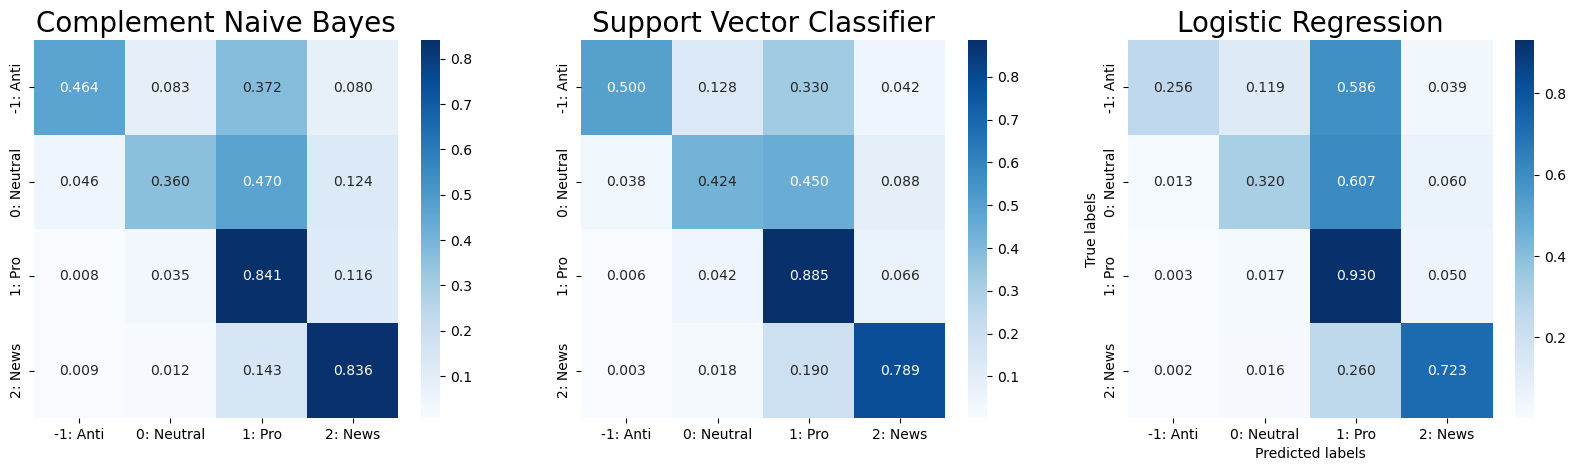

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=100)
sns.heatmap(cm_cnb, annot=True, cmap='Blues', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=axes[0])
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=axes[1])
sns.heatmap(cm_mlr, annot=True, cmap='Blues', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=axes[2])
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
axes[0].set_title(f"Complement Naive Bayes", fontsize=20)
axes[1].set_title(f"Support Vector Classifier", fontsize=20)
axes[2].set_title(f"Logistic Regression", fontsize=20)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic